## Chargement du Github

In [1]:
!git clone https://github.com/houssemradhouane/CNN-Algorithm-for-Image-Classification.git

Cloning into 'CNN-Algorithm-for-Image-Classification'...
remote: Enumerating objects: 2177, done.
remote: Counting objects: 100% (2177/2177), done.
remote: Compressing objects: 100% (2165/2165), done.
remote: Total 2177 (delta 20), reused 2168 (delta 11), pack-reused 0
Receiving objects: 100% (2177/2177), 22.20 MiB | 27.32 MiB/s, done.
Resolving deltas: 100% (20/20), done.


In [2]:
import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        num_images += len(dirs)
    
        # Chargement des images, 
        for idx_img in range(len(dirs)):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_size,image_size))
                x[current_index] = np.asarray(img)
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

In [7]:
path = "./CNN-Algorithm-for-Image-Classification/Dataset/"
labels = ['keyboard', 'cooler', 'headphone','mouse','case','speaker']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
print(x_train.shape, y_train.shape)

x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
print(x_val.shape, y_val.shape)

x_test, y_test = load_data(path, labels, dataset='test', image_size=64)
print(x_test.shape, y_test.shape)

(732, 64, 64, 3) (732, 1)
(147, 64, 64, 3) (147, 1)
(137, 64, 64, 3) (137, 1)


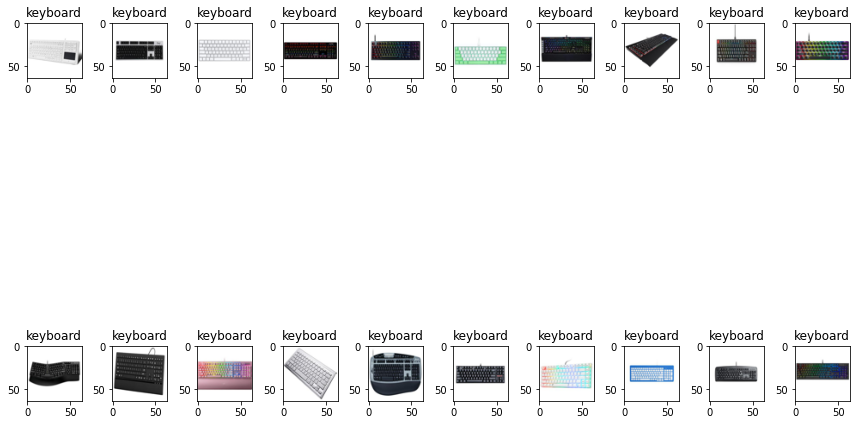

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(20)
for i in range(0, 20):
    plt.subplot(2, 10, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()